In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df =  pd.read_csv('../../../data/train_V2.csv')

In [35]:
df[:5]

,Unnamed: 0,OutcomeType,Cat,Dog,Female,Intact,Male,Neutered,Spayed,Age,...,Tan,Tick,Tiger,Torbie,Tortie,Tricolor,White,Yellow,Mixed,Purebred
0,0,Return_to_owner,0,1,0,0,1,1,0,365,...,0,0,0,0,0,0,1,0,1,0
1,1,Euthanasia,1,0,1,0,0,0,1,365,...,0,0,0,0,0,0,0,0,1,0
2,2,Adoption,0,1,0,0,1,1,0,730,...,0,0,0,0,0,0,1,0,1,0
3,3,Transfer,1,0,0,1,1,0,0,21,...,0,0,0,0,0,0,0,0,1,0
4,4,Transfer,0,1,0,0,1,1,0,730,...,1,0,0,0,0,0,0,0,0,1


In [36]:
feature_cols = ["Cat","Dog","Female","Intact","Male","Neutered","Age","Spayed","Purebred"]

In [37]:
X = df[feature_cols]

In [38]:
y = df['OutcomeType']

In [39]:
y[:10]

0    Return_to_owner
1         Euthanasia
2           Adoption
3           Transfer
4           Transfer
5           Transfer
6           Transfer
7           Transfer
8           Adoption
9           Adoption
Name: OutcomeType, dtype: object

In [40]:
X[:10]

,Cat,Dog,Female,Intact,Male,Neutered,Age,Spayed,Purebred
0,0,1,0,0,1,1,365,0,0
1,1,0,1,0,0,0,365,1,0
2,0,1,0,0,1,1,730,0,0
3,1,0,0,1,1,0,21,0,0
4,0,1,0,0,1,1,730,0,1
5,0,1,1,1,0,0,30,0,1
6,1,0,0,1,1,0,21,0,0
7,1,0,0,0,0,0,21,0,0
8,0,1,1,0,0,0,150,1,0
9,0,1,1,0,0,0,365,1,1


In [41]:
my_logreg = LogisticRegression()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=4)

In [43]:
my_logreg.fit(X_train, y_train)

/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_predict_logred = my_logreg.predict(X_test)

In [45]:
accuracy_logred = accuracy_score(y_test, y_predict_logred)

In [46]:
print(accuracy_logred)

0.6247661803217359


In [47]:
accuracy_list = cross_val_score(my_logreg, X, y, cv=10, scoring='accuracy')

print(accuracy_list)

/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/mnt/c/Users/R

[0.62990654 0.61794393 0.62341062 0.62116679 0.63238594 0.62701085
 0.61452096 0.63721453 0.62673156 0.63183521]


In [48]:
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.6262126918992109


In [49]:
feature_cols = ["Cat","Dog","Female","Intact","Male","Neutered","Age","Spayed","Agouti","Apricot","Black","Blue","Brindle","Brown","Buff","Calico","Chocolate","Cream","Fawn","Flame","Gold","Gray","Lilac","Liver","Lynx","Merle","Orange","Pink","Point","Red","Ruddy","Sable","Seal","Silver","Smoke","Tabby","Tan","Tick","Tiger","Torbie","Tortie","Tricolor","White","Yellow","Mixed","Purebred"]

X = df[feature_cols]

y = df['OutcomeType']

my_logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=4)

my_logreg.fit(X_train, y_train)

y_predict_logred = my_logreg.predict(X_test)

accuracy_logred = accuracy_score(y_test, y_predict_logred)

print(accuracy_logred)




/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6249532360643472


In [50]:

accuracy_list = cross_val_score(my_logreg, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print(accuracy_cv)
## ROC Curve 

/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/mnt/c/Users/R

0.6270362974341481


In [51]:
feature_cols = ["Cat","Dog","Female","Intact","Male","Neutered","Age","Spayed","Agouti","Apricot","Black","Blue","Brindle","Brown","Buff","Calico","Chocolate","Cream","Fawn","Flame","Gold","Gray","Lilac","Liver","Lynx","Merle","Orange","Pink","Point","Red","Ruddy","Sable","Seal","Silver","Smoke","Tabby","Tan","Tick","Tiger","Torbie","Tortie","Tricolor","White","Yellow","Mixed","Purebred"]

X = df[feature_cols]
X = preprocessing.scale(X) 
y = df['OutcomeType']

my_logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=4)

my_logreg.fit(X_train, y_train)

y_predict_logred = my_logreg.predict(X_test)

accuracy_logred = accuracy_score(y_test, y_predict_logred)

print(accuracy_logred)

/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6251402918069585


In [52]:
accuracy_list = cross_val_score(my_logreg, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print(accuracy_cv)
## ROC Curve 

/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/mnt/c/Users/R

0.6271483908783917


In [53]:
accuracyList = []
features = ["Cat","Dog","Female","Intact","Male","Neutered","Age","Spayed","Agouti","Apricot","Black","Blue","Brindle","Brown","Buff","Calico","Chocolate","Cream","Fawn","Flame","Gold","Gray","Lilac","Liver","Lynx","Merle","Orange","Pink","Point","Red","Ruddy","Sable","Seal","Silver","Smoke","Tabby","Tan","Tick","Tiger","Torbie","Tortie","Tricolor","White","Yellow","Mixed","Purebred"]
for x in features:
    feature_cols = [x]
    X= df[feature_cols]
    y = df['OutcomeType']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=6)
    my_logreg = LogisticRegression()
    my_logreg.fit(X_train, y_train)
    y_predict = my_logreg.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    accuracyList.append(accuracy)
    

/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/mnt/c/Users/R

/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/R

/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/mnt/c/Users/R

In [54]:
accuracyList

[0.4566030677141788,
 0.4566030677141788,
 0.4047886270108492,
 0.5775346053123831,
 0.4047886270108492,
 0.4765245043022821,
 0.4218106995884774,
 0.4942012719790498,
 0.4047886270108492,
 0.4047886270108492,
 0.4047886270108492,
 0.4022633744855967,
 0.4047886270108492,
 0.4047886270108492,
 0.4047886270108492,
 0.40693976805087917,
 0.4047886270108492,
 0.4047886270108492,
 0.4047886270108492,
 0.4047886270108492,
 0.4057239057239057,
 0.40422745978301533,
 0.4051627384960718,
 0.4049756827534605,
 0.4047886270108492,
 0.4047886270108492,
 0.4114291058735503,
 0.4048821548821549,
 0.4047886270108492,
 0.4047886270108492,
 0.4047886270108492,
 0.4047886270108492,
 0.4049756827534605,
 0.4047886270108492,
 0.4047886270108492,
 0.42976056864945755,
 0.4047886270108492,
 0.4047886270108492,
 0.4047886270108492,
 0.4051627384960718,
 0.4047886270108492,
 0.4047886270108492,
 0.4047886270108492,
 0.4039468761690984,
 0.4047886270108492,
 0.4047886270108492]

In [55]:
feature_cols = ["Cat","Dog","Female","Intact","Male","Neutered","Age","Spayed","Agouti","Apricot","Black","Blue","Brindle","Brown","Buff","Calico","Chocolate","Cream","Fawn","Flame","Gold","Gray","Lilac","Liver","Lynx","Merle","Orange","Pink","Point","Red","Ruddy","Sable","Seal","Silver","Smoke","Tabby","Tan","Tick","Tiger","Torbie","Tortie","Tricolor","White","Yellow","Mixed","Purebred"]

X = df[feature_cols]
X = preprocessing.scale(X) 
y = df['OutcomeType']

my_logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=4)

my_logreg.fit(X_train, y_train)

y_predict_logred = my_logreg.predict(X_test)

accuracy_logred = accuracy_score(y_test, y_predict_logred)

print(accuracy_logred)

/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6251402918069585


#### Here We are going to try it with the changed dataset

In [56]:
df2  =  pd.read_csv('../../../data/train_V3R.csv')
feature_cols = ["Cat","Dog","Female","Intact","Male","Neutered","Age","Spayed","Agouti","Apricot","Black","Blue","Brindle","Brown","Buff","Calico","Chocolate","Cream","Fawn","Flame","Gold","Gray","Lilac","Liver","Lynx","Merle","Orange","Pink","Point","Red","Ruddy","Sable","Seal","Silver","Smoke","Tabby","Tan","Tick","Tiger","Torbie","Tortie","Tricolor","White","Yellow","Mixed","Purebred"]

X2 = df2[feature_cols]

y2 = df2['OutcomeType']

my_logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=0.20, random_state=4)

my_logreg.fit(X_train, y_train)

y_predict_logred = my_logreg.predict(X_test)

accuracy_logred = accuracy_score(y_test, y_predict_logred)

print(accuracy_logred)
print(df2[::5])



0.7962962962962963
       Unnamed: 0 OutcomeType  Cat  Dog  Female  Intact  Male  Neutered  \
0               0          OK    0    1       0       0     1         1   
5               5          NO    0    1       1       1     0         0   
10             10          NO    1    0       0       0     0         0   
15             15          OK    1    0       0       0     1         1   
20             20          NO    0    1       0       1     1         0   
25             25          NO    1    0       1       1     0         0   
30             30          NO    1    0       1       0     0         0   
35             35          NO    0    1       0       1     1         0   
40             40          OK    1    0       1       0     0         0   
45             45          OK    0    1       0       0     1         1   
50             50          NO    1    0       1       1     0         0   
55             55          NO    1    0       0       1     1         0   
60    

/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
accuracy_list = cross_val_score(my_logreg, X2, y2, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print(accuracy_cv)

/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_mod

0.799917930506644


/mnt/c/Users/Ricky/Desktop/CS4661_SAO/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


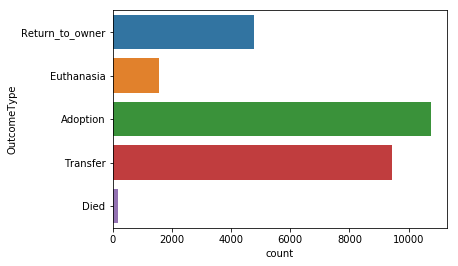

In [58]:
sns.countplot(y="OutcomeType", data=df)
plt.show()

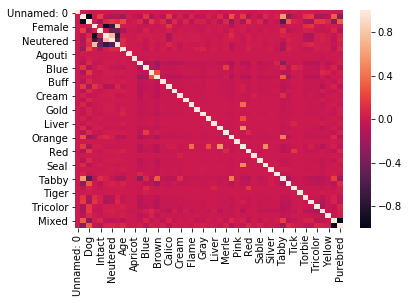

In [59]:
sns.heatmap(df.corr())
plt.show()

In [69]:
X.shape

(26729, 46)

1. Introduce Ourselves
2. Introduce Topic -- Problems - Why - Address Problems
3. Discuss Data Set -- Features -- etc- 
4. Discuss PreProcessing the Data
5. Discuss Methods Used and Results
6. Data Analytics: Certain Breeds have a higher chance of survival, certain features correlate to other things etc... 
7. Outro/Conclusion -- Solution 